In [1]:
from sklearn.datasets import make_blobs

X, y = make_blobs(
    n_samples=150,
    n_features=2,
    centers=3,
    cluster_std=0.5,
    shuffle=True,
    random_state=0)

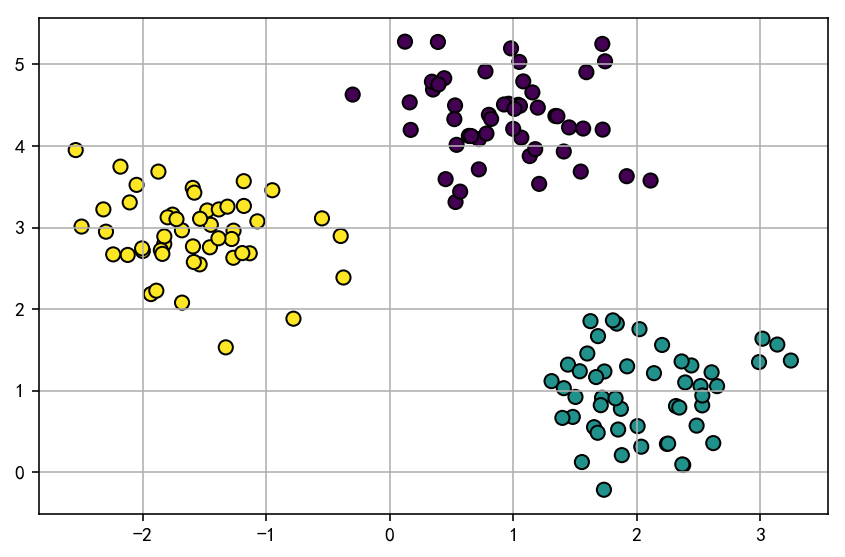

In [4]:
import matplotlib.pyplot as plt

# plt.scatter(X[:, 0], X[:, 1], c='white', marker='o', edgecolor='black', s=50)
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolor='black', s=50)

plt.grid()
plt.tight_layout()
plt.show()

In [5]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=3,
    init='random',
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=0)

y_km = km.fit_predict(X)

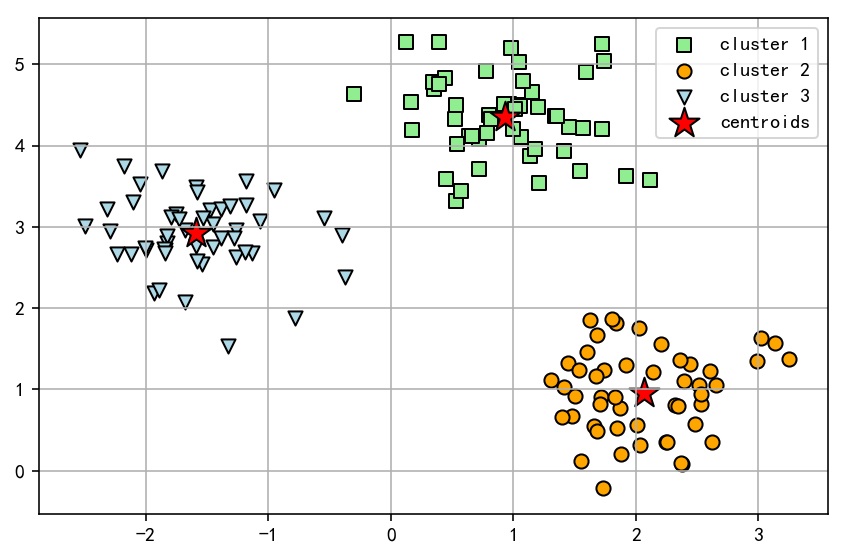

In [6]:
plt.scatter(
    X[y_km == 0, 0],
    X[y_km == 0, 1],
    s=50,
    c='lightgreen',
    marker='s',
    edgecolor='black',
    label='cluster 1')
plt.scatter(
    X[y_km == 1, 0],
    X[y_km == 1, 1],
    s=50,
    c='orange',
    marker='o',
    edgecolor='black',
    label='cluster 2')
plt.scatter(
    X[y_km == 2, 0],
    X[y_km == 2, 1],
    s=50,
    c='lightblue',
    marker='v',
    edgecolor='black',
    label='cluster 3')

# 聚类中心
plt.scatter(
    km.cluster_centers_[:, 0],
    km.cluster_centers_[:, 1],
    s=250,
    marker='*',
    c='red',
    edgecolor='black',
    label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

## 使用手肘法确定 k 的个数

In [9]:
# inertia_ 是失真指数，即 SSE
km.inertia_

27.76648286600629

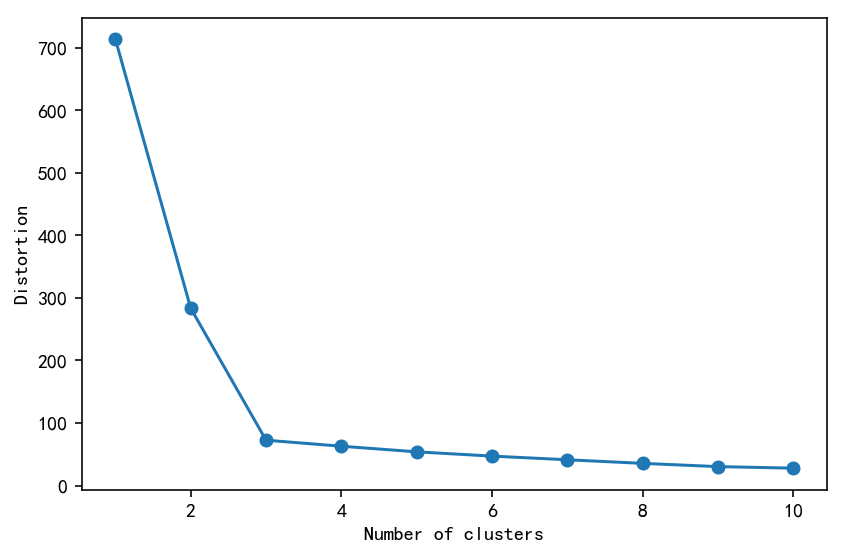

In [10]:
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i,
        init='k-means++',
        n_init=10,
        max_iter=300,
        random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

## 使用轮廓系数

使用轮廓系数确定 $k$ 的个数。

$a$：样本与同一类中所有其他点之间的平均距离。

$b$：样本与下一个最近的聚类中的所有其他点之间的平均距离。

$$
s = \frac{b - a}{max(a, b)}
$$

In [11]:
km = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=0)

In [12]:
y_km = km.fit_predict(X)

In [14]:
import numpy as np

cluster_labels = np.unique(y_km)
cluster_labels

array([0, 1, 2], dtype=int32)

In [15]:
n_clusters = cluster_labels.shape[0]
n_clusters

3

### 每个样本可以计算出一个轮廓值

In [16]:
from sklearn.metrics import silhouette_samples

silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
silhouette_vals

array([0.75956181, 0.43233677, 0.7747553 , 0.72286402, 0.76729229,
       0.72280273, 0.69484791, 0.76101499, 0.77303671, 0.67320272,
       0.62375802, 0.40348569, 0.80092777, 0.73225118, 0.59884632,
       0.78954087, 0.75955598, 0.81572606, 0.79897477, 0.7936958 ,
       0.72221435, 0.76384238, 0.72671597, 0.73219594, 0.74183186,
       0.81463826, 0.76045682, 0.62065362, 0.57912988, 0.76929277,
       0.707709  , 0.8045906 , 0.7116979 , 0.78561661, 0.66997314,
       0.65285806, 0.68519649, 0.77015391, 0.72638012, 0.77905009,
       0.56028722, 0.70806176, 0.66201873, 0.77669657, 0.79206045,
       0.79499104, 0.67874476, 0.43073904, 0.72878986, 0.75911278,
       0.61479508, 0.68506268, 0.76602547, 0.80521304, 0.79571018,
       0.77872478, 0.63708395, 0.62515462, 0.58878683, 0.7767243 ,
       0.72889549, 0.40154174, 0.80287718, 0.78189854, 0.76687374,
       0.35466307, 0.79135592, 0.56967556, 0.37334246, 0.54630918,
       0.61918571, 0.70584253, 0.79635805, 0.61369253, 0.74071

In [17]:
len(X), len(y_km), len(silhouette_vals)

(150, 150, 150)

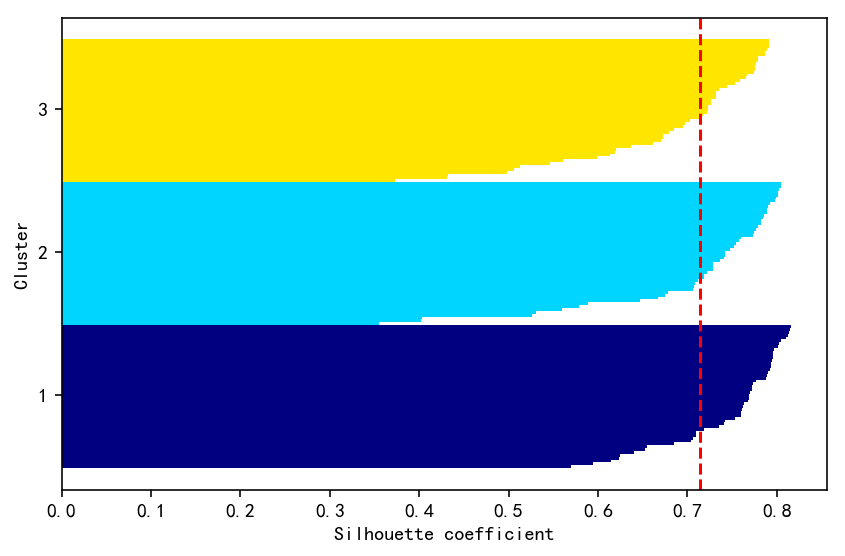

In [18]:
from matplotlib import cm

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(
        range(y_ax_lower, y_ax_upper),
        c_silhouette_vals,
        height=1.0,
        edgecolor='none',
        color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

虚线是“平均轮廓系数”。

### 看一看如果聚类只有 2 个时候表现如何

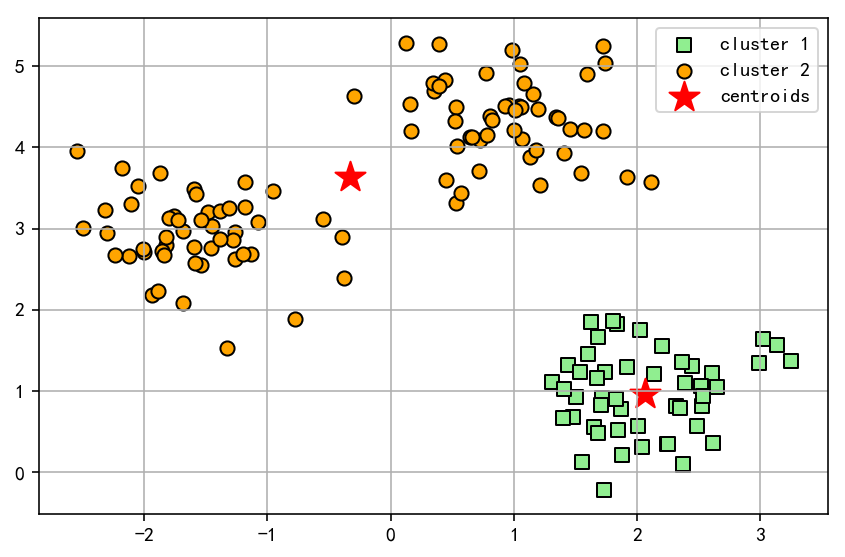

In [19]:
km = KMeans(
    n_clusters=2,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=0)
y_km = km.fit_predict(X)

plt.scatter(
    X[y_km == 0, 0],
    X[y_km == 0, 1],
    s=50,
    c='lightgreen',
    edgecolor='black',
    marker='s',
    label='cluster 1')
plt.scatter(
    X[y_km == 1, 0],
    X[y_km == 1, 1],
    s=50,
    c='orange',
    edgecolor='black',
    marker='o',
    label='cluster 2')

plt.scatter(
    km.cluster_centers_[:, 0],
    km.cluster_centers_[:, 1],
    s=250,
    marker='*',
    c='red',
    label='centroids')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

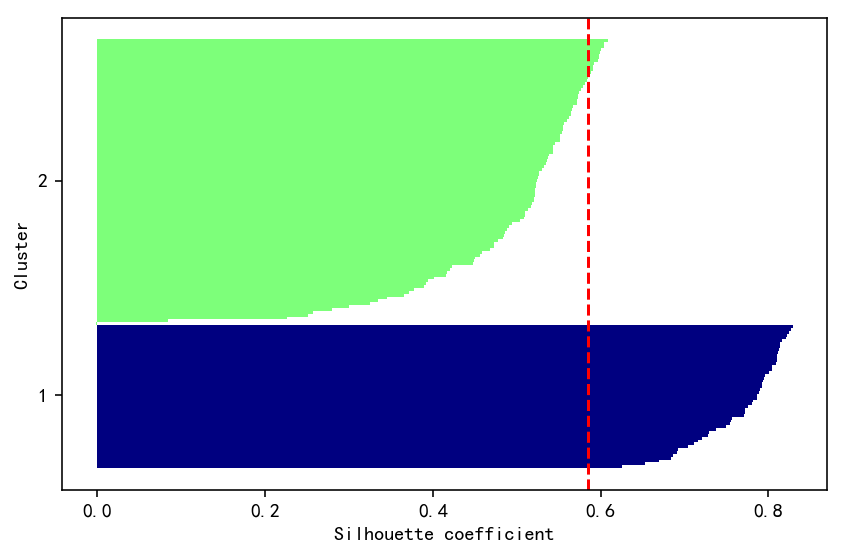

In [20]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(
        range(y_ax_lower, y_ax_upper),
        c_silhouette_vals,
        height=1.0,
        edgecolor='none',
        color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()